Импорты

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

Загрузить данные и выделить только элементы, относящиеся к двум (наименее разделимым) классам. Создадим модель

In [3]:
iris = datasets.load_iris()
values = iris.data[iris.target!=0]
targets = iris.target[iris.target!=0]

clf = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
clf.fit(values, targets)
prediction = clf.predict(values)

# True if prediction was right, False otherwise
correctness = prediction == targets

Перебрать все пары признаков и построить графики с разбитием на подпространства

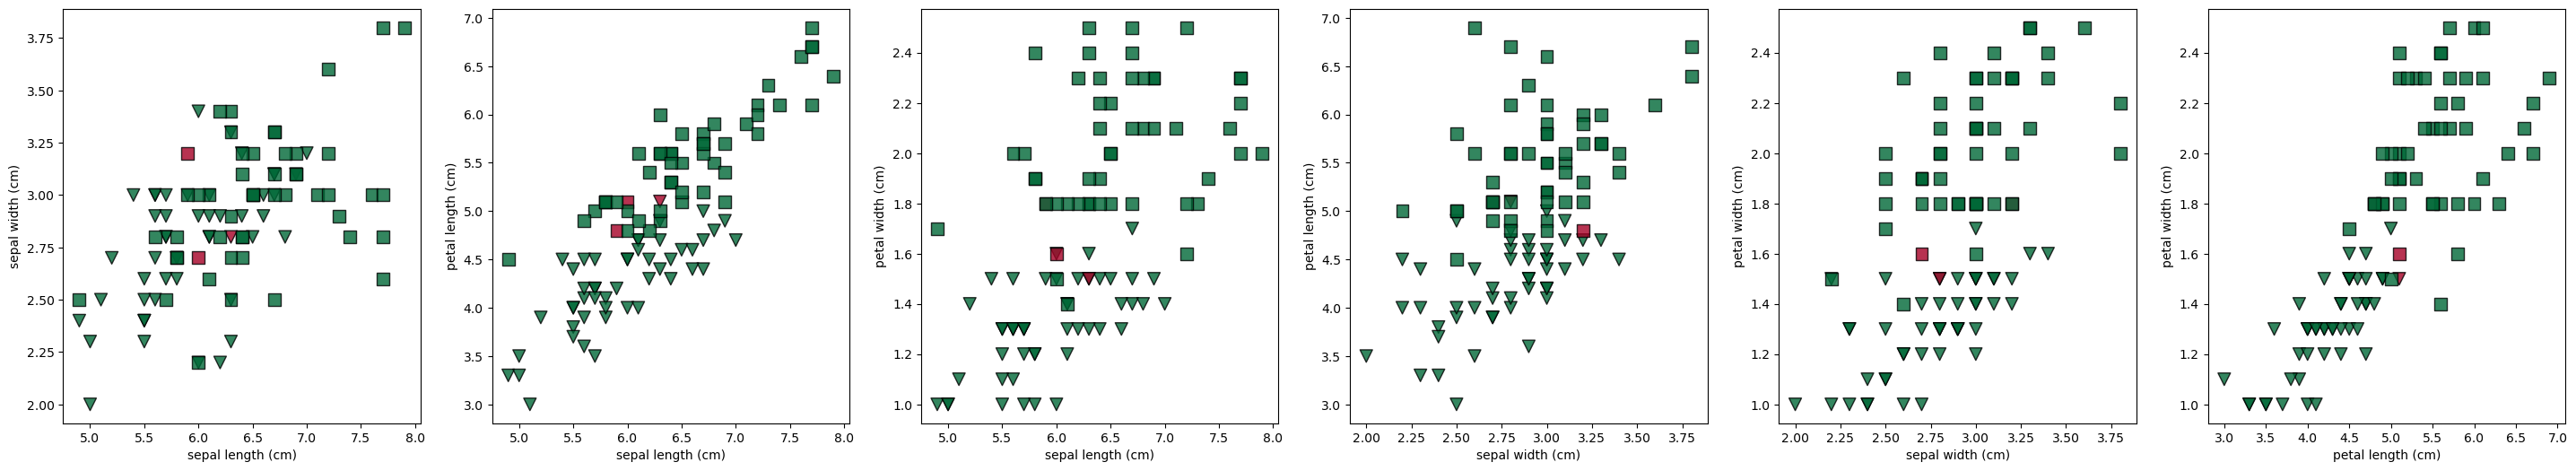

In [8]:
features_count = len(iris['feature_names']) # number of features
fig_count = int(features_count * (features_count - 1) / 2) # number of pairs of features
fig, axs = plt.subplots(1, fig_count, figsize=(36,6)) # all graphs for pairs of fetures
plot_number = 0 # current plot id


# get all possible features combination without copies
for feature_idA in range(features_count-1):
    for feature_idB in range(feature_idA + 1, features_count):

        ax = axs[plot_number]
        plot_number+=1
        
        ax.set_xlabel(iris['feature_names'][feature_idA])
        ax.set_ylabel(iris['feature_names'][feature_idB])
        
        # scatter first class
        ax.scatter(values[:,feature_idA][prediction == 1], values[:, feature_idB][prediction == 1], c=correctness[prediction == 1], cmap=plt.cm.RdYlGn, s=100, edgecolors='k', alpha=0.8, marker="v")
        
        # scatter second class
        ax.scatter(values[:,feature_idA][prediction == 2], values[:, feature_idB][prediction == 2], c=correctness[prediction == 2], cmap=plt.cm.RdYlGn, s=100, edgecolors='k', alpha=0.8, marker="s")

Здесь *треугольники* - первый класс, *квадраты* - второй
*Зелёный* цвет - предположение на линейном дискриминанте совпадает с правильным значением
*Красный* цвет - не совпадает